# **Prediksi Pengunjung Mal menggunakan K-Means**
## **Machine Learning Kelas B**
## **Anggota Kelompok**

1. Hana Shabrina (240601211xx)
2. Muhamad Aditya Yusuf Jatikusumo (24060121140157)
3. Muhammad Naufal Arkan (240601211xx)
4. Raditya Ilham Hastoro (240601211xx)

## **Introduction**

Dalam project ini, kita akan melakukan clustering data menggunakan K-Means Clustering. Kita akan melakukan clustering data customer berdasarkan umur, pendapatan tahunan, dan spending score. Kita akan menggunakan data Mall Customer Segmentation Data.

Detail mengenai data:
Dataset: Mall Customer Segmentation Data
Customer ID: Kode unik untuk customer
Gender: Jenis kelamin customer
Age: Usia customer
Annual Income (k$): Pendapatan tahunan customer dalam ribu dollar
Spending Score (1-100): Skor yang diberikan untuk customer berdasarkan perilaku dan pengeluaran customer

Customer akan dikelompokkan menjadi beberapa kelompok berdasarkan umur, pendapatan tahunan, dan spending score. Kita akan menggunakan K-Means Clustering untuk melakukan clustering data.

Segmentasi customer ini dapat membantu kita untuk memahami customer lebih dalam. Dengan memahami customer, kita dapat menentukan strategi pemasaran yang tepat untuk setiap customer. Selain itu, kita juga dapat menentukan customer mana yang dapat menjadi target market kita.

Hal yang akan dilakukan:
1. Import data
2. Preprocessing data
3. Visualisasi data
4. Membuat model K-Means Clustering
5. Melakukan prediksi
6. Visualisasi hasil prediksi
7. Menyimpan model
8. Membuat API menggunakan Flask
9. Membuat aplikasi web sederhana menggunakan Flask




In [1]:
# Import library
import pandas as pd # Untuk memproses data
import numpy as np # Untuk melakukan operasi pada data
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Untuk visualisasi data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans # Untuk melakukan clustering

import warnings
warnings.filterwarnings("ignore")

## **Preprocessing Data**

Dalam preprocessing data ini, kita membaca data telebih dahulu menggunakan library dari **pandas**

In [2]:
# Read the data
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Print the first 5 rows of the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Get the shape of the data
df.shape

(200, 5)

In [5]:
# Check the data types of the variables
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [8]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [9]:
# Check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [11]:
# Drop the CustomerID column
df.drop('CustomerID', axis=1, inplace=True)

In [12]:
# Get the most important features
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


## **Hasil Observasi Data**

1. Rentang umur dari customer berada di antara 18-70 tahun
2. Rentang pendapatan tahunan dari customer berada di antara 15-137 ribu dollar
3. Rentang spending score dari customer berada di antara 1-99
4. Tidak ada missing values pada data
5. Rata-rata umur customer adalah 39 tahun
6. Rata-rata pendapatan tahunan customer adalah 60 ribu dollar
7. Rata-rata spending score customer atau pengeluaran customer adalah 50
8. Customer yang memiliki spending score tinggi umumnya memiliki pendapatan tahunan yang tinggi
9. Customer yang memiliki spending score rendah umumnya memiliki pendapatan tahunan yang rendah
10. Customer yang memiliki spending score sedang umumnya memiliki pendapatan tahunan yang sedang
11. Customer yang memiliki spending score tinggi umumnya berusia muda
12. Customer yang memiliki spending score rendah umumnya berusia tua
13. Customer yang memiliki spending score sedang umumnya berusia muda dan berusia tua
14. Customer yang memiliki spending score tinggi umumnya adalah perempuan
15. Customer yang memiliki spending score rendah umumnya adalah laki-laki
16. Customer yang memiliki spending score sedang umumnya adalah laki-laki dan perempuan
17. Tidak terdapat outlier pada data
18. Tidak terdapat missing values pada data
19. Baris CustomerID telah dihapus karena tidak diperlukan dalam proses clustering

In [13]:
# Rename column
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

## **Visualisasi Data**


<AxesSubplot: xlabel='Age', ylabel='Density'>

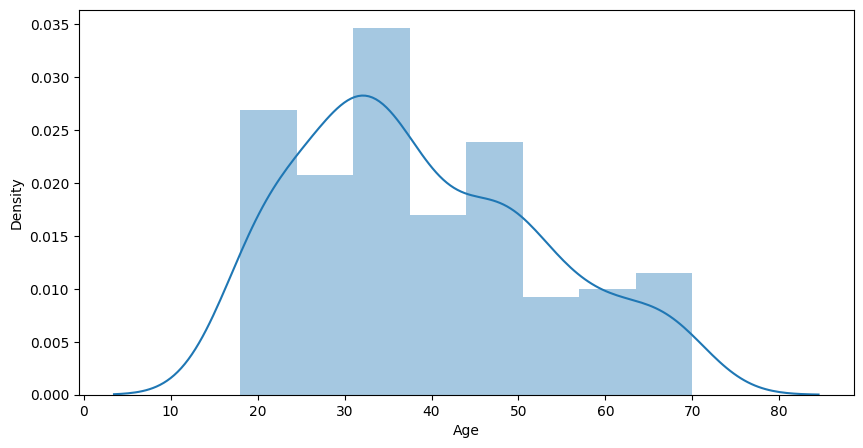

In [14]:
sns.distplot(df['Age'])

**Data Age**

Terlihat bahwa data age memiliki distribusi normal, umur dari customer mengikuti right-skewed distribution. Rentang umur dari customer berada di antara 18-70 tahun. Rata-rata umur customer adalah 39 tahun.

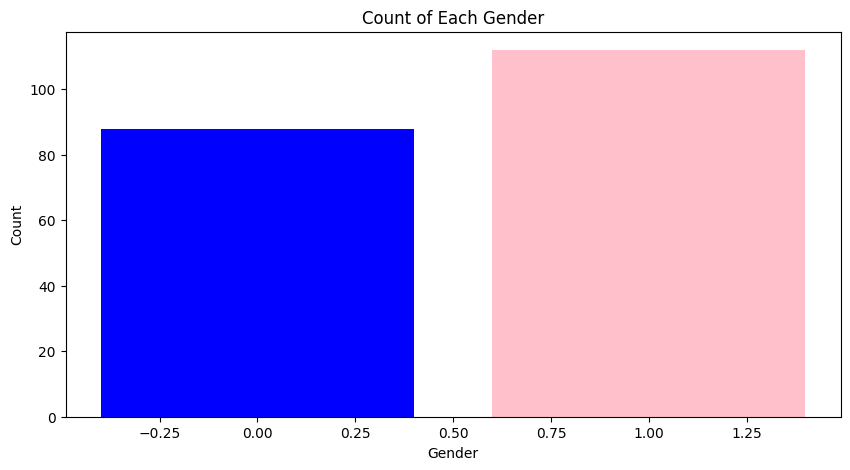

In [15]:
gender_counts = df['Gender'].value_counts()

colors = ['blue' if gender != 1 else 'pink' for gender in gender_counts.index]

# Plotting the count using Matplotlib with specified colors
plt.bar(gender_counts.index, gender_counts, color=colors)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Each Gender')

# Display the plot
plt.show()

<AxesSubplot: xlabel='annual_income', ylabel='Density'>

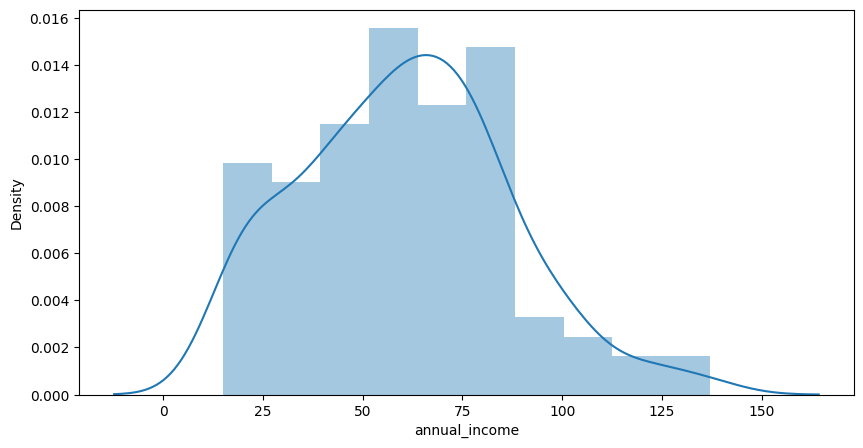

In [16]:
sns.distplot(df['annual_income'])

<AxesSubplot: xlabel='spending_score', ylabel='Density'>

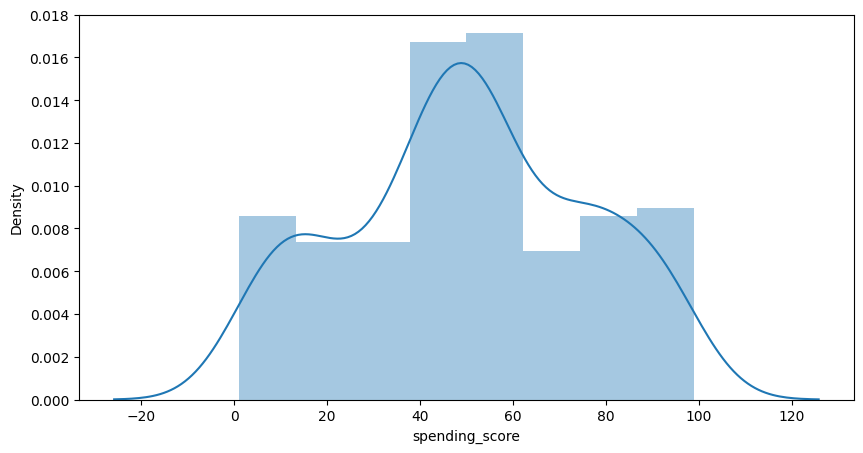

In [17]:
sns.distplot(df['spending_score'])

Dapat dilihat bahwa spending score dari customer kurang lebih mengikuti distribusi normal. (Inpo bantu jelasin)

<AxesSubplot: >

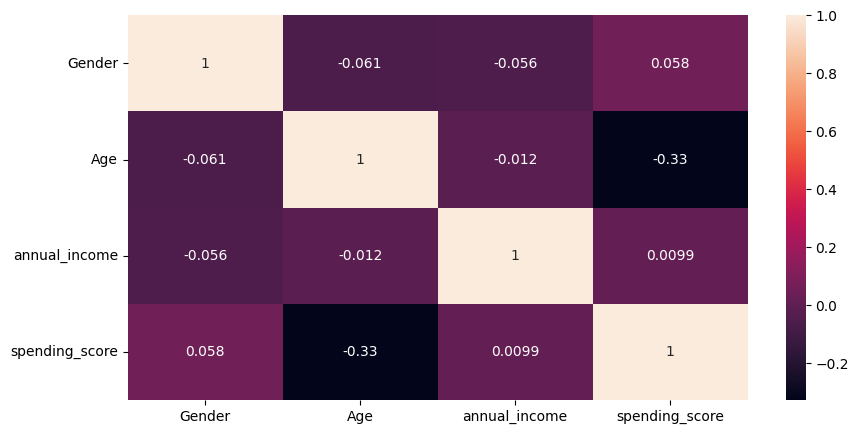

In [18]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

Tidak terdapat korelasi antar fitur

Text(29.140624999999993, 0.5, 'spending_score')

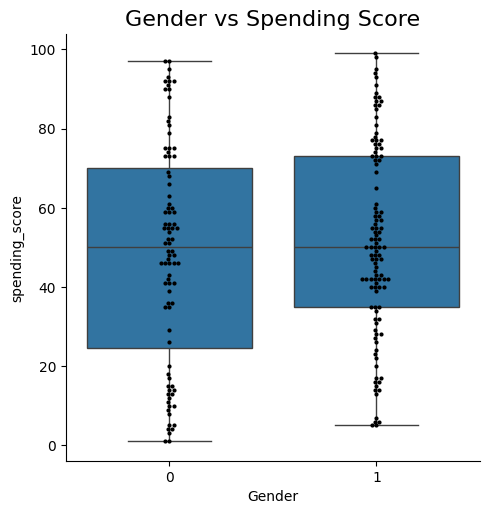

In [19]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Gender", y="spending_score", kind="box", data=df)
sns.swarmplot(x="Gender", y="spending_score", color="k", size=3, data=df, ax=g.ax);
plt.title('Gender vs Spending Score', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('spending_score')

Text(29.140624999999993, 0.5, 'annual_income')

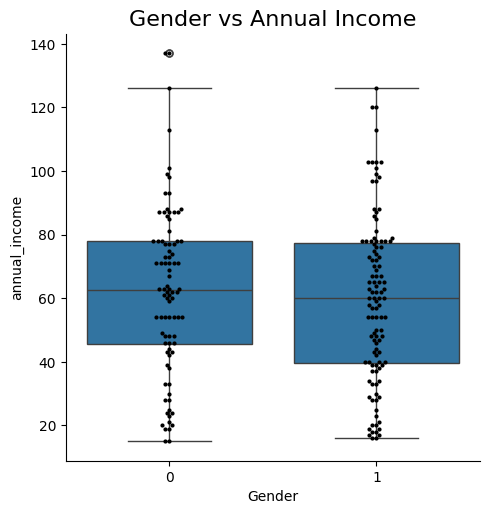

In [20]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Gender", y="annual_income", kind="box", data=df)
sns.swarmplot(x="Gender", y="annual_income", color="k", size=3, data=df, ax=g.ax);
plt.title('Gender vs Annual Income', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('annual_income')

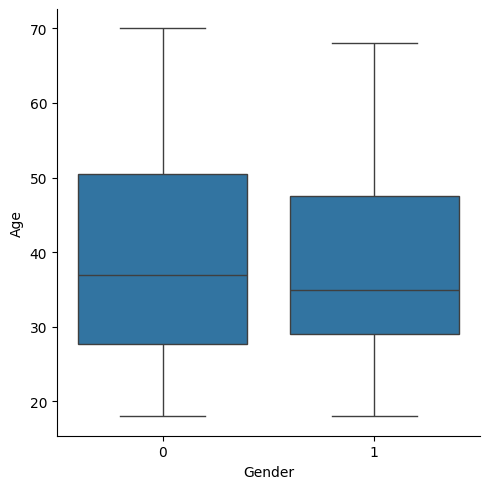

In [21]:
sns.catplot(x="Gender", y="Age", kind="box", data=df);

In [22]:
# Drop the gender column
df.drop('Gender', axis=1, inplace=True)
# df.head()

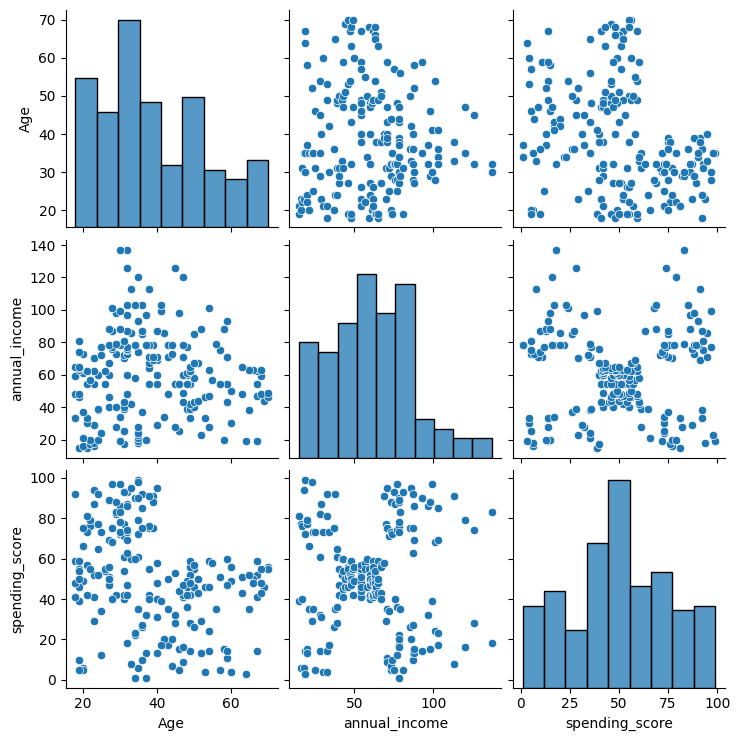

In [23]:
# Plot the data for each 2 columns
sns.pairplot(df)

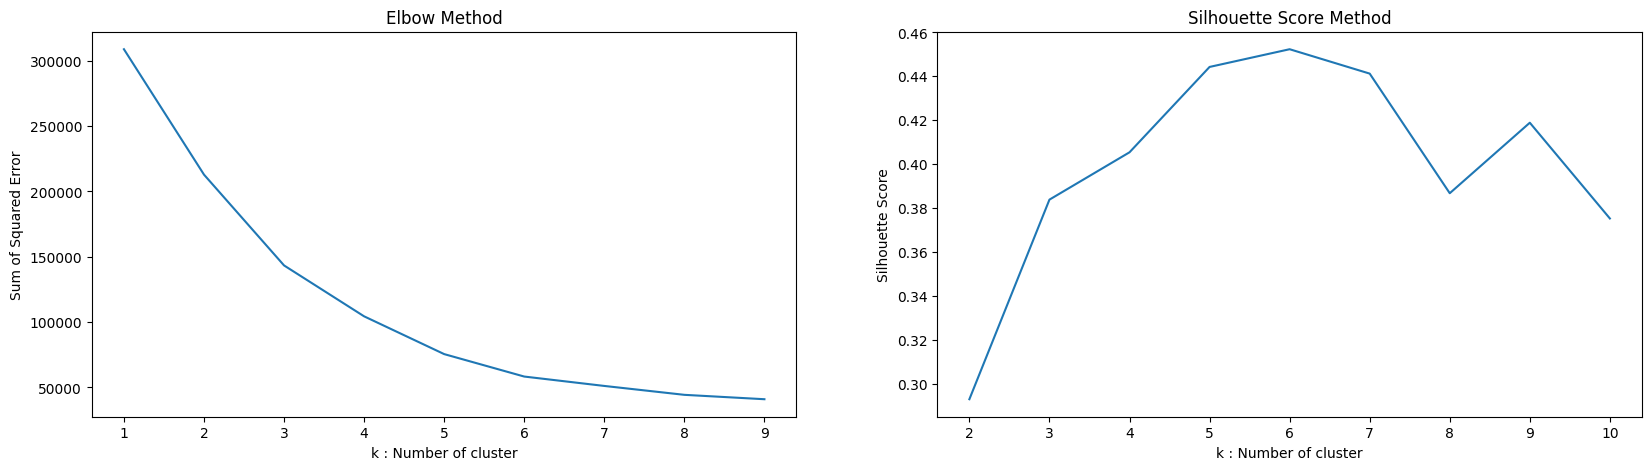

In [24]:
from sklearn.metrics.cluster import silhouette_score
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(df)
    labels = kmeans.labels_
    sil.append(silhouette_score(df, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [25]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

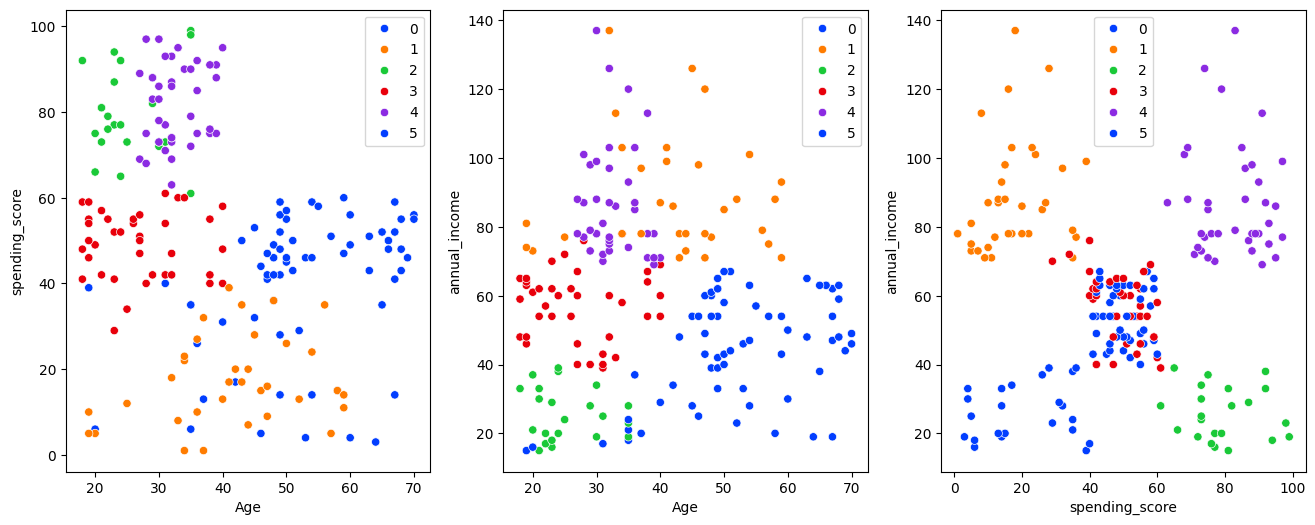

In [26]:
# Plot for each 2 columns
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
palette = sns.color_palette('bright', 5)
sns.scatterplot(x='Age', y='spending_score', hue=y_kmeans, palette=palette, data=df, ax=ax[0])
sns.scatterplot(x='Age', y='annual_income', hue=y_kmeans, palette=palette, data=df, ax=ax[1])
sns.scatterplot(x='spending_score', y='annual_income', hue=y_kmeans, palette=palette, data=df, ax=ax[2])

plt.show()

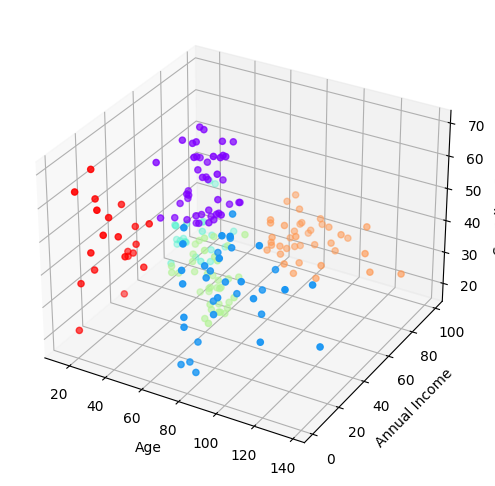

In [27]:
# 3d plot the Age, annual_income and spending_score
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['annual_income'], df['spending_score'], df['Age'], c=y_kmeans, cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()


In [28]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [29]:
# Show the first 5 rows of the data
df.head()

,Age,annual_income,spending_score,Cluster
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5


In [30]:
print(df)

     Age  annual_income  spending_score  Cluster
0     19             15              39        5
1     21             15              81        2
2     20             16               6        5
3     23             16              77        2
4     31             17              40        5
..   ...            ...             ...      ...
195   35            120              79        4
196   45            126              28        1
197   32            126              74        4
198   32            137              18        1
199   30            137              83        4

[200 rows x 4 columns]


In [31]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

# **Evaluation**

In [32]:
# Data type of the Cluster column
df.groupby(['Cluster', 'Age', 'annual_income', 'spending_score']).size().reset_index().rename(columns={0:'count'})

,Cluster,Age,annual_income,spending_score,count
0,0,43,48,50,1
1,0,45,54,53,1
2,0,46,54,44,1
3,0,47,43,41,1
4,0,47,49,42,1
...,...,...,...,...,...
195,5,54,28,14,1
196,5,58,20,15,1
197,5,60,30,4,1
198,5,64,19,3,1


In [33]:
df['Cluster'].unique()

array([5, 2, 0, 3, 4, 1])

In [34]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model_baru.pkl', 'wb'))

In [35]:
from sklearn.metrics import davies_bouldin_score

dbi_values = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df.drop('Cluster', axis=1))

    dbi = davies_bouldin_score(df.drop('Cluster', axis=1), df['Cluster'])

    dbi_values.append(dbi)

for k, dbi in enumerate(dbi_values, start=2):
    print(f"K = {k}: Davies-Bouldin Index = {round(dbi, 3)}")

K = 2: Davies-Bouldin Index = 1.357
K = 3: Davies-Bouldin Index = 0.875
K = 4: Davies-Bouldin Index = 0.891
K = 5: Davies-Bouldin Index = 0.822
K = 6: Davies-Bouldin Index = 0.747
K = 7: Davies-Bouldin Index = 0.8
K = 8: Davies-Bouldin Index = 0.836
K = 9: Davies-Bouldin Index = 0.903
K = 10: Davies-Bouldin Index = 0.961
K = 11: Davies-Bouldin Index = 0.959
